In [1]:
#Dependencies

from pathlib import Path
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

## Data preperation
* Reading `crypto_data.csv` into Pandas. The dataset was obtained from [CryptoCompare](https://min-api.cryptocompare.com/data/all/coinlist).

In [2]:
file_path = file_path = Path("crypto_data.csv")
df_cryptodata = pd.read_csv(file_path)
df_cryptodata.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


* Discard all cryptocurrencies that are not being traded. In other words, filter for currencies that are currently being traded. Once you have done this, drop the `IsTrading` column from the dataframe.

In [3]:
df_cryptodata.count()

Unnamed: 0         1252
CoinName           1252
Algorithm          1252
IsTrading          1252
ProofType          1252
TotalCoinsMined     744
TotalCoinSupply    1252
dtype: int64

In [4]:
df_cryptodata = df_cryptodata.drop('IsTrading', axis=1)

In [5]:
df_cryptodata.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [6]:
df_cryptodata.count()

Unnamed: 0         1252
CoinName           1252
Algorithm          1252
ProofType          1252
TotalCoinsMined     744
TotalCoinSupply    1252
dtype: int64

* Remove all rows that have at least one null value.

In [7]:
df_cryptodata = df_cryptodata.dropna()
df_cryptodata.count()

Unnamed: 0         744
CoinName           744
Algorithm          744
ProofType          744
TotalCoinsMined    744
TotalCoinSupply    744
dtype: int64

* Filter for cryptocurrencies that have been mined. That is, the total coins mined should be greater than zero.

In [8]:
df_cryptodata = df_cryptodata[df_cryptodata.TotalCoinsMined >0]
df_cryptodata.count()

Unnamed: 0         577
CoinName           577
Algorithm          577
ProofType          577
TotalCoinsMined    577
TotalCoinSupply    577
dtype: int64

In [9]:
df_cryptodata.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0


* In order for your dataset to be comprehensible to a machine learning algorithm, its data should be numeric. Since the coin names do not contribute to the analysis of the data, delete the `CoinName` from the original dataframe.

In [10]:
df_crypto=df_cryptodata.drop(columns=['CoinName', 'Unnamed: 0'])
df_crypto.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0


* Your next step in data preparation is to convert the remaining features with text values, `Algorithm` and `ProofType`, into numerical data. To accomplish this task, use Pandas to create dummy variables. Examine the number of rows and columns of your dataset now. How did they change?

In [11]:
df_clean = pd.get_dummies(df_crypto, columns=['Algorithm', 'ProofType'])


In [14]:
df_clean.drop
df_clean.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df_clean.count()

TotalCoinsMined                     577
TotalCoinSupply                     577
Algorithm_1GB AES Pattern Search    577
Algorithm_536                       577
Algorithm_Argon2d                   577
                                   ... 
ProofType_Proof of Authority        577
ProofType_Proof of Trust            577
ProofType_TPoS                      577
ProofType_Zero-Knowledge Proof      577
ProofType_dPoW/PoW                  577
Length: 101, dtype: int64

* Standardize your dataset so that columns that contain larger values do not unduly influence the outcome.

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
s_data = scaler.fit_transform(df_clean)

In [14]:
s_data

array([[-0.11450078, -0.15072489, -0.04166667, ..., -0.04166667,
        -0.04166667, -0.04166667],
       [-0.09041991, -0.14255828, -0.04166667, ..., -0.04166667,
        -0.04166667, -0.04166667],
       [ 0.55369883,  4.67185916, -0.04166667, ..., -0.04166667,
        -0.04166667, -0.04166667],
       ...,
       [-0.11433426, -0.15040252, -0.04166667, ..., -0.04166667,
        -0.04166667, -0.04166667],
       [-0.11449785, -0.15070954, -0.04166667, ..., -0.04166667,
        -0.04166667, -0.04166667],
       [-0.11401032, -0.14918981, -0.04166667, ..., -0.04166667,
        -0.04166667, -0.04166667]])

In [15]:
print(s_data[0:1])

[[-0.11450078 -0.15072489 -0.04166667 -0.04166667 -0.04166667 -0.05897678
  -0.0934947  -0.04166667 -0.05897678 -0.05897678 -0.04166667 -0.04166667
  -0.18949048 -0.05897678 -0.0934947  -0.04166667 -0.11081833 -0.0722944
  -0.04166667 -0.04166667 -0.1518211  -0.04166667 -0.13280318 -0.04166667
  -0.04166667 -0.0835512  -0.05897678 -0.04166667 -0.04166667 -0.04166667
  -0.05897678 -0.04166667 -0.0835512  -0.0934947  -0.10250796 -0.04166667
  -0.1258772  -0.13280318 -0.1518211  -0.04166667 -0.0835512  -0.04166667
  -0.04166667 -0.0722944  -0.17423301 -0.04166667 -0.04166667 -0.04166667
  -0.0722944  -0.16888013 -0.30802055 -0.04166667 -0.0934947  -0.0934947
  -0.05897678  1.39963365 -0.04166667 -0.04166667 -0.04166667 -0.0835512
  -0.04166667 -0.04166667 -0.04166667 -0.04166667 -0.04166667 -0.05897678
  -0.04166667 -0.04166667 -0.39536391 -0.04166667 -0.17423301 -0.04166667
  -0.0835512  -0.0835512  -0.10250796 -0.04166667 -0.1258772  -0.04166667
  -0.04166667 -0.04166667 -0.04166667 -0.

### Dimensionality Reduction

* Creating dummy variables above dramatically increased the number of features in your dataset. Perform dimensionality reduction with PCA. Rather than specify the number of principal components when you instantiate the PCA model, it is possible to state the desired **explained variance**. For example, say that a dataset has 100 features. Using `PCA(n_components=0.99)` creates a model that will preserve approximately 99% of the explained variance, whether that means reducing the dataset to 80 principal components or 3. For this project, preserve 90% of the explained variance in dimensionality reduction. How did the number of the features change?

In [18]:
# pca .90
pca = PCA(n_components=0.90)
pca_sdata = pca.fit_transform(s_data)
print(pca_sdata[0:1])

[[-3.25873467e-01  1.13989379e+00 -5.58793131e-01  1.32984608e-03
  -3.59593891e-14 -2.61238156e-14  1.18968640e-14 -1.35857440e-02
  -1.22859540e+00 -6.12158919e-02 -3.86020536e-01  1.48982336e-01
  -4.45000826e-01  1.71338181e-02 -6.58860626e-01  7.84001176e-01
   1.22315040e-01  1.63833945e-01  1.50131823e-02  2.03051093e-02
  -2.15618608e-02 -5.35382652e-03  2.00483147e-03  1.28010585e-03
  -1.82584450e-02  8.72146880e-04 -9.98342125e-04 -6.72539232e-05
   5.97365095e-04 -4.88426011e-03 -1.71612367e-03 -3.86796329e-04
   8.58523330e-15  8.18436607e-07  1.05273611e-03 -1.43781456e-03
   2.22201597e-03  2.39256098e-04  1.26617477e-03  8.48562304e-03
  -2.59203262e-03 -7.11152368e-04 -1.39016550e-14 -1.14111907e-14
  -5.64124712e-15 -1.31882556e-03  4.02075687e-03 -3.56035402e-03
   4.93285351e-03 -3.67601683e-04  2.69146320e-15 -3.47441725e-16
   2.29093536e-15  4.41873370e-15 -2.03257767e-15 -2.88258338e-16
  -4.69165759e-15  2.81084777e-15  2.16536556e-15  1.59118242e-15
   1.13755

* Next, further reduce the dataset dimensions with t-SNE and visually inspect the results. In order to accomplish this task, run t-SNE on the principal components: the output of the PCA transformation. Then create a scatter plot of the t-SNE output. Observe whether there are distinct clusters or not.

In [19]:
tsne = TSNE(learning_rate=7)
transformed_features = tsne.fit_transform(pca_sdata)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


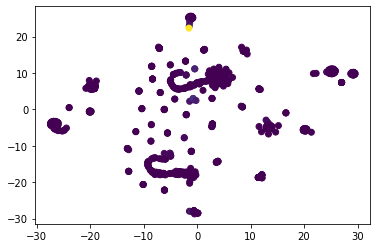

In [20]:
labels = df_cryptodata.TotalCoinsMined
plt.scatter(transformed_features[:,0], transformed_features[:,1], c=labels)
plt.show()

### Cluster Analysis with k-Means

* Create an elbow plot to identify the best number of clusters. Use a for-loop to determine the inertia for each `k` between 1 through 10. Determine, if possible, where the elbow of the plot is, and at which value of `k` it appears.

In [22]:
inertia = []
k = list(range(1,11))
for i in k:
    km = KMeans(n_clusters=i, random_state=4)
    km.fit(s_data)
    inertia.append(km.inertia_)
    
    # Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,58277.000000
1,2,56901.081034
2,3,55744.299250
3,4,55041.348706
4,5,54401.978560


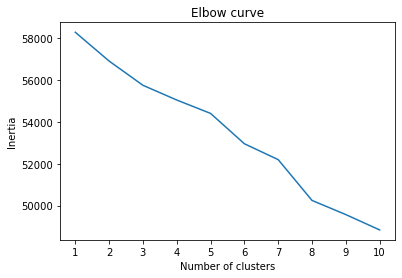

In [24]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve')
plt.show()

Create a function called get_clusters(k, data) that finds the k clusters using K-Means on data. The function should return a DataFrame copy of Data that should include a new column containing the clusters found.

In [25]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["clusters"] = model.labels_

    return data

In [29]:
clusters = get_clusters(10, df_elbow )

In [27]:
clusters

,k,inertia,clusters
0,1,58277.000000,2
1,2,56901.081034,5
2,3,55744.299250,7
3,4,55041.348706,3
4,5,54401.978560,9
5,6,52952.557152,0
6,7,52194.640530,6
7,8,50246.510455,1
8,9,49570.509648,8
9,10,48839.030711,4


Using the k clusters and K-Means on the data we can conclude that there are 9 predominent clusters of cryptocurrencies. 